### 2021_09_28_2 3

In [25]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("./CSV/train.csv")
test = pd.read_csv("./CSV/test.csv")
sub = pd.read_csv("./CSV/sample_submission.csv")

print("train shape :", train.shape)
print("test shape :", test.shape)
print("sub shape :", sub.shape)
print(train.columns)
print(test.columns)

train shape : (891, 12)
test shape : (418, 11)
sub shape : (418, 2)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
for col1 in train.columns :
    print(col1)
    print(train[col1].head())
    print()

PassengerId
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

Survived
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Pclass
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Sex
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

SibSp
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

Parch
0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

Ticket
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Fare
0     7.250

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

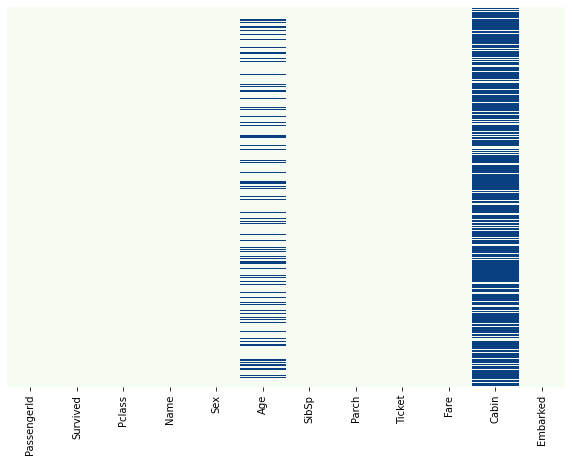

In [10]:
plt.figure(figsize = (10,7)) # cmpa : summer도 해보기
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "GnBu")

### 범주형 변수, 수치형 변수

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
num_col = []
for one in train.columns :
    # print(one)
    if train[one].dtype in ["int64", "float64"] :
        num_col.append(one)
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
num_cols = [col for col in train.columns[:12] if train[col].dtype in ["int64", "float64"]]
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
obj_cols = [col for col in train.columns if train[col].dtype in ["object"]]
obj_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
train[num_cols].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train[obj_cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train.Survived.unique()

array([0, 1])

In [26]:
for col in obj_cols :
    uniq = np.unique(train[col].astype(str))
    print("colname : {}, uniq : {}".format(col, uniq), end = "\n\n")

colname : Name, uniq : ['Abbing, Mr. Anthony' 'Abbott, Mr. Rossmore Edward'
 'Abbott, Mrs. Stanton (Rosa Hunt)' 'Abelson, Mr. Samuel'
 'Abelson, Mrs. Samuel (Hannah Wizosky)' 'Adahl, Mr. Mauritz Nils Martin'
 'Adams, Mr. John' 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)'
 'Aks, Mrs. Sam (Leah Rosen)' 'Albimona, Mr. Nassef Cassem'
 'Alexander, Mr. William' 'Alhomaki, Mr. Ilmari Rudolf' 'Ali, Mr. Ahmed'
 'Ali, Mr. William' 'Allen, Miss. Elisabeth Walton'
 'Allen, Mr. William Henry' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine'
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)'
 'Allum, Mr. Owen George'
 'Andersen-Jensen, Miss. Carla Christine Nielsine' 'Anderson, Mr. Harry'
 'Andersson, Master. Sigvard Harald Elias'
 'Andersson, Miss. Ebba Iris Alfrida' 'Andersson, Miss. Ellis Anna Maria'
 'Andersson, Miss. Erna Alexandra' 'Andersson, Miss. Ingeborg Constanzia'
 'Andersson, Miss. Sigrid Elisabeth' 'Andersson, Mr. Anders Johan'
 'Andersson, Mr. August Edvard ("Wenne

### 나이에 대해 살표보자
    * plt.subplots(행, 열, figsize = (크기지정))

In [27]:
import matplotlib.pyplot as plt

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


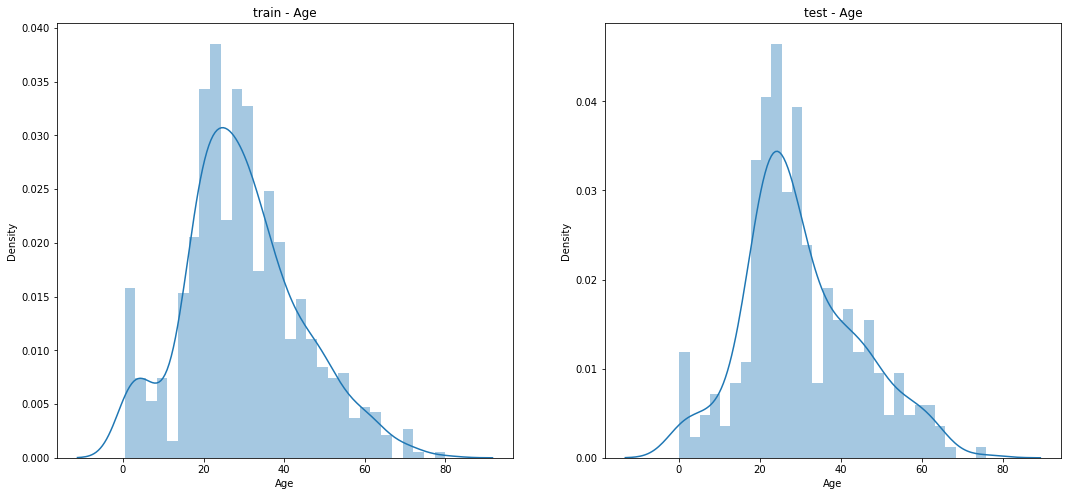

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

### 결측치 처리 - 나이, 요금
    * 나이는 평균으로 처리
    * 결측치 값을 채우기 - usage : data["열이름"].fillna(값)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())